In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from dateutil.parser import parse
import datetime as dt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)




In [4]:
df = pd.read_csv('train.csv')


In [5]:
col = 'date'



df[col] = pd.to_datetime(df[col],format = '%Y-%m-%d')

df['year'] = df[col].dt.year
df['month'] = df[col].dt.month



df['year_month'] = pd.to_datetime(df[col]).dt.to_period('M')



In [6]:
df.head()

,date,store,item,sales,year,month,year_month
0,2013-01-01,1,1,13,2013,1,2013-01
1,2013-01-02,1,1,11,2013,1,2013-01
2,2013-01-03,1,1,14,2013,1,2013-01
3,2013-01-04,1,1,13,2013,1,2013-01
4,2013-01-05,1,1,10,2013,1,2013-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
date          913000 non-null datetime64[ns]
store         913000 non-null int64
item          913000 non-null int64
sales         913000 non-null int64
year          913000 non-null int64
month         913000 non-null int64
year_month    913000 non-null period[M]
dtypes: datetime64[ns](1), int64(5), period[M](1)
memory usage: 48.8 MB


In [8]:
df_grouped = df.groupby(['store']).agg({'sales':'sum'})

In [9]:
df_grouped


,sales
store,
1,4315603
2,6120128
3,5435144
4,5012639
5,3631016
6,3627670
7,3320009
8,5856169
9,5025976


In [10]:
grouped = df.groupby(['year_month']).agg({'sales':'sum'})

In [11]:
grouped

,sales
year_month,
2013-01,454904
2013-02,459417
2013-03,617382
2013-04,682274
2013-05,763242
2013-06,795597
2013-07,855922
2013-08,766761
2013-09,689907


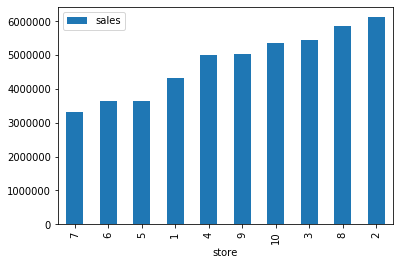

In [12]:
df.groupby('store')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar')
plt.show()


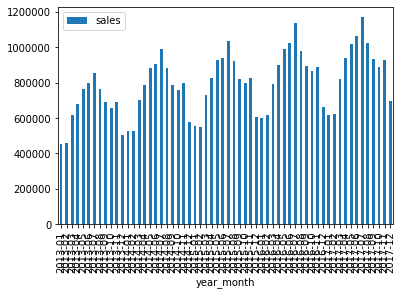

In [13]:
df.groupby('year_month')[['sales']].sum().sort_values(by='year_month', ascending=True).plot(kind='bar')
plt.show()

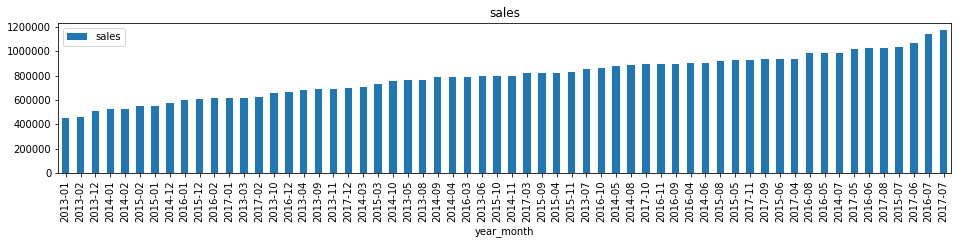

In [14]:
df.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar', subplots=True, layout=(5,1), sharex=False, figsize=(16,16) )
plt.show()

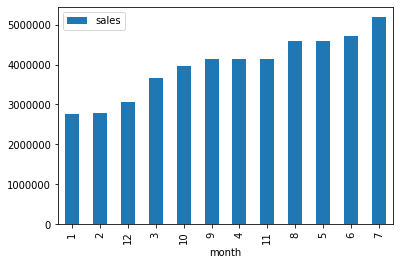

In [15]:
df.groupby('month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar')

In [16]:
df_2013 = df[df['year']==2013]

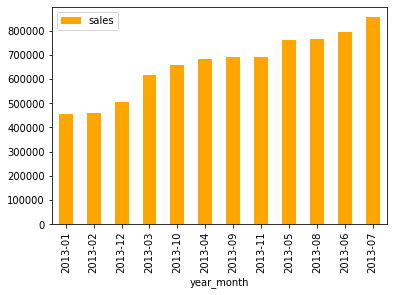

In [17]:
df_2013.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar',color = 'orange' )
plt.show()

In [18]:
df_2014 = df[df['year']==2014]



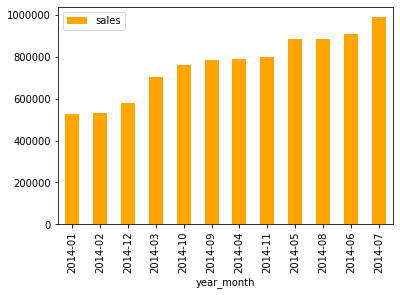

In [19]:
df_2014.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar',color = 'orange' )
plt.show()

In [20]:
df_2015 = df[df['year']==2015]

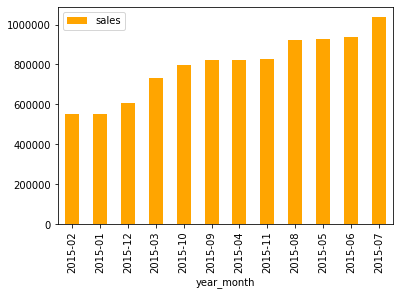

In [21]:
df_2015.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar' ,color = 'orange')
plt.show()

In [22]:
df_2016 = df[df['year']==2016]

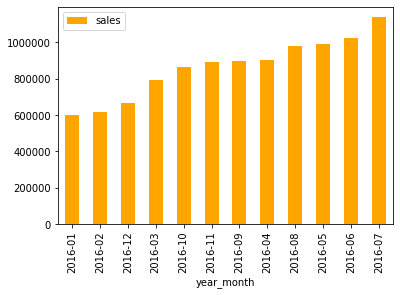

In [23]:
df_2016.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar',color = 'orange' )
plt.show()

In [24]:
df_2017 = df[df['year']==2017]

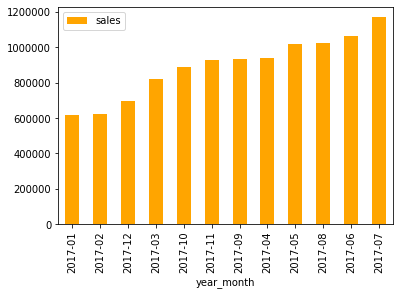

In [25]:
df_2017.groupby('year_month')[['sales']].sum().sort_values(by='sales', ascending=True).plot(kind='bar',color = 'orange' )
plt.show()

In [26]:
df_1 = df[df['store']==1]

In [27]:
g = df_2013.groupby(['store','year_month']).agg({'sales':'sum'})

In [28]:
g

sales
store year_month        
1     2013-01      41077
      2013-02      41306
      2013-03      55827
      2013-04      61523
      2013-05      69272
      2013-06      71531
      2013-07      77527
      2013-08      69745
      2013-09      62408
      2013-10      59130
      2013-11      62465
      2013-12      46029
2     2013-01      58520
      2013-02      59384
      2013-03      79609
      2013-04      87987
      2013-05      98361
      2013-06     102158
      2013-07     109645
      2013-08      97992
      2013-09      88673
      2013-10      84093
      2013-11      88874
      2013-12      64942
3     2013-01      51972
      2013-02      52081
      2013-03      70069
      2013-04      77767
      2013-05      86664
      2013-06      90659
      2013-07      97233
      2013-08      87559
      2013-09      78653
      2013-10      74593
      2013-11      78754
      2013-12      57932
4     2013-01      47720
      2013-02      48806
      2013-03      64522
      2013-04      71801
      2013-05      80487
      2013-06      83900
      2013-07      90077
      2013-08      80435
      2013-09      72243
      2013-10      68884
      2013-11      73146
      2013-12      53038
5     2013-01      34405
      2013-02      34918
      2013-03      47082
      2013-04      51944
      2013-05      57794
      2013-06      60804
      2013-07      65075
      2013-08      58368
      2013-09      52544
      2013-10      49876
      2013-11      52454
      2013-12      38519
6     2013-01      34944
      2013-02      34808
      2013-03      47214
      2013-04      51647
      2013-05      57732
      2013-06      60712
      2013-07      64973
      2013-08      58443
      2013-09      52476
      2013-10      50217
      2013-11      52959
      2013-12      38248
7     2013-01      31508
      2013-02      32021
      2013-03      42932
      2013-04      47464
      2013-05      52876
      2013-06      55327
      2013-07      59550
      2013-08      53456
      2013-09      48024
      2013-10      45922
      2013-11      47986
      2013-12      35157
8     2013-01      56043
      2013-02      56279
      2013-03      75889
      2013-04      83568
      2013-05      93753
      2013-06      97797
      2013-07     105040
      2013-08      94052
      2013-09      84722
      2013-10      80809
      2013-11      84828
      2013-12      61875
9     2013-01      47620
      2013-02      48190
      2013-03      64989
      2013-04      71782
      2013-05      80093
      2013-06      83420
      2013-07      90194
      2013-08      80650
      2013-09      72873
      2013-10      69193
      2013-11      73173
      2013-12      53611
10    2013-01      51095
      2013-02      51624
      2013-03      69249
      2013-04      76791
      2013-05      86210
      2013-06      89289
      2013-07      96608
      2013-08      86061
      2013-09      77291
      2013-10      73870
      2013-11      78004
      2013-12      57256

In [29]:
c = df_2014.groupby(['store','year_month']).agg({'sales':'sum'})

In [30]:
c

sales
store year_month        
1     2014-01      47788
      2014-02      47838
      2014-03      63729
      2014-04      71149
      2014-05      80108
      2014-06      82196
      2014-07      89389
      2014-08      79794
      2014-09      71134
      2014-10      68740
      2014-11      72506
      2014-12      52415
2     2014-01      67315
      2014-02      67605
      2014-03      90547
      2014-04     101464
      2014-05     113269
      2014-06     116490
      2014-07     127024
      2014-08     113216
      2014-09     100340
      2014-10      97733
      2014-11     102805
      2014-12      73989
3     2014-01      59674
      2014-02      60408
      2014-03      80280
      2014-04      90321
      2014-05     100332
      2014-06     103340
      2014-07     112166
      2014-08     101012
      2014-09      89139
      2014-10      86474
      2014-11      91540
      2014-12      65834
4     2014-01      55657
      2014-02      55433
      2014-03      73721
      2014-04      82768
      2014-05      92772
      2014-06      95054
      2014-07     103734
      2014-08      93136
      2014-09      82594
      2014-10      80049
      2014-11      83712
      2014-12      60575
5     2014-01      39893
      2014-02      40105
      2014-03      53527
      2014-04      60359
      2014-05      67257
      2014-06      69232
      2014-07      75088
      2014-08      67413
      2014-09      59706
      2014-10      57884
      2014-11      61256
      2014-12      43879
6     2014-01      40107
      2014-02      40285
      2014-03      53649
      2014-04      59942
      2014-05      67464
      2014-06      68874
      2014-07      75164
      2014-08      67474
      2014-09      59764
      2014-10      57590
      2014-11      60548
      2014-12      44353
7     2014-01      36891
      2014-02      36698
      2014-03      49263
      2014-04      55026
      2014-05      61574
      2014-06      63249
      2014-07      68478
      2014-08      61769
      2014-09      54286
      2014-10      53004
      2014-11      55569
      2014-12      40171
8     2014-01      64528
      2014-02      65163
      2014-03      86233
      2014-04      96410
      2014-05     108324
      2014-06     110975
      2014-07     121926
      2014-08     108946
      2014-09      96793
      2014-10      93060
      2014-11      98548
      2014-12      70991
9     2014-01      55410
      2014-02      55917
      2014-03      74326
      2014-04      82704
      2014-05      93032
      2014-06      95704
      2014-07     104122
      2014-08      93296
      2014-09      82839
      2014-10      79265
      2014-11      84336
      2014-12      60828
10    2014-01      58724
      2014-02      59665
      2014-03      79026
      2014-04      88771
      2014-05      98745
      2014-06     101728
      2014-07     111919
      2014-08      99540
      2014-09      88529
      2014-10      85084
      2014-11      89963
      2014-12      65013

In [31]:
e = g.sort_values(by='sales', ascending=True)

store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

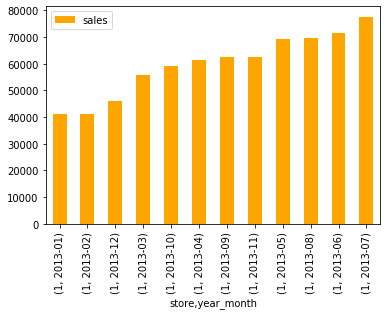

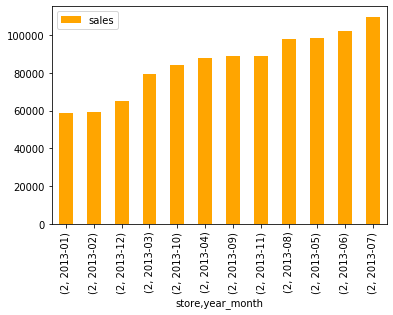

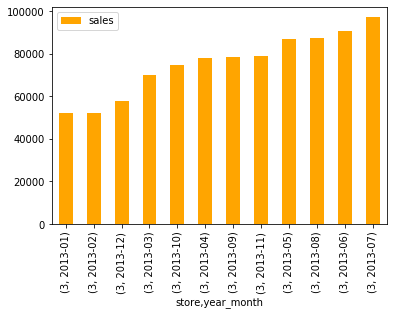

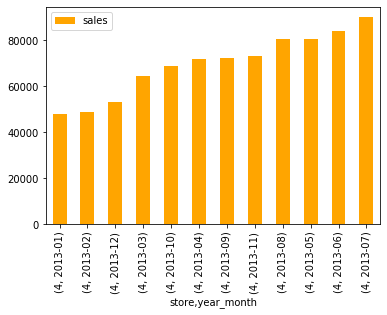

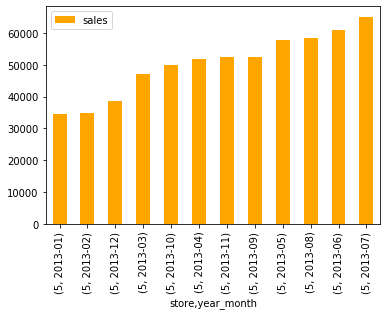

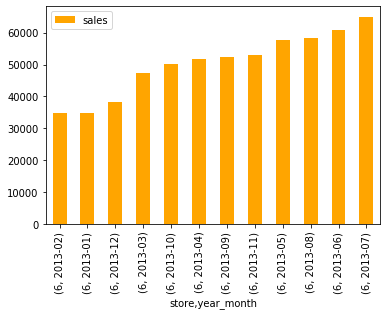

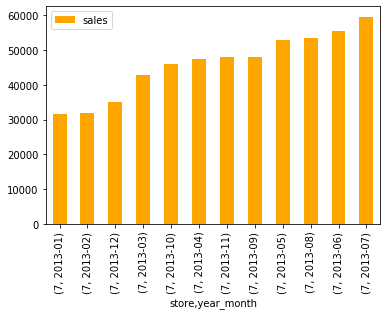

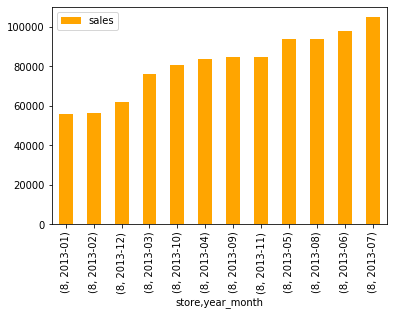

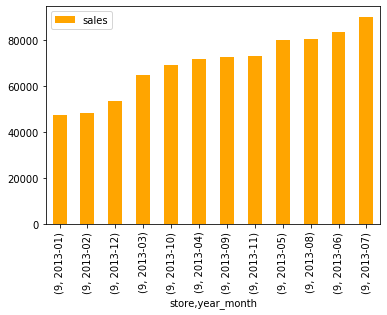

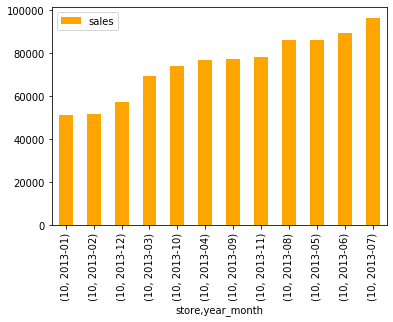

In [32]:

e.groupby('store').plot(kind = "bar",color = 'orange')

In [33]:
b = c.sort_values(by='sales', ascending=True)     

store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

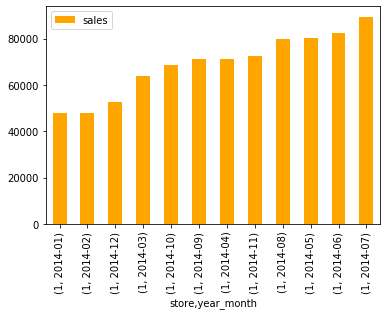

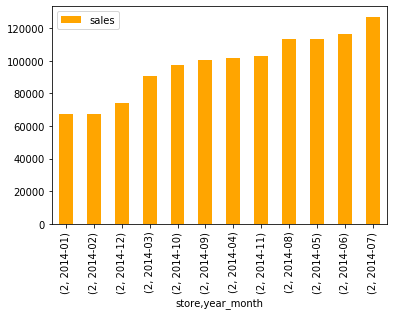

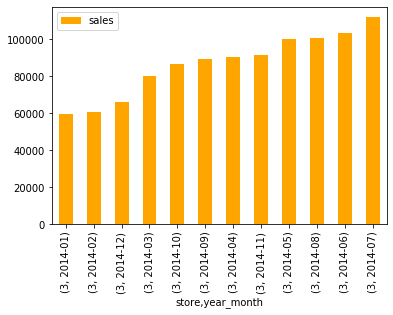

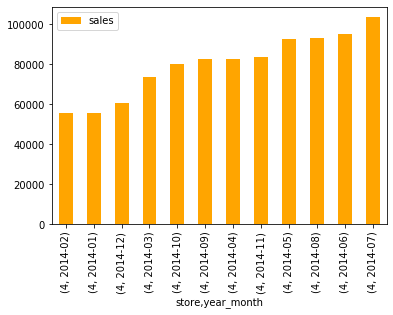

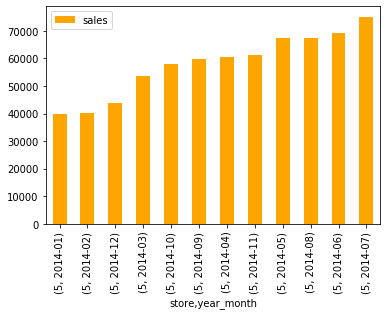

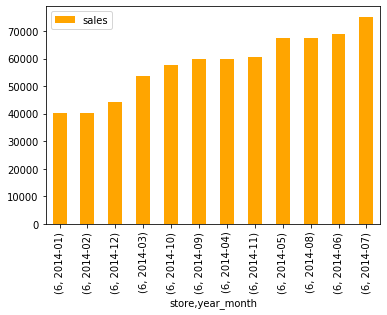

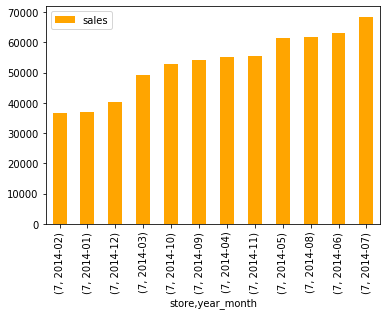

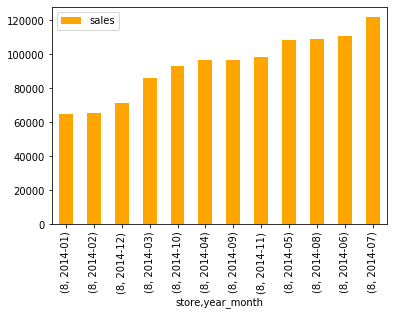

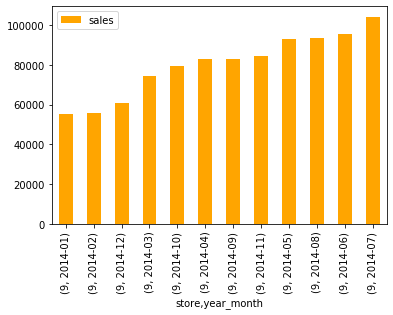

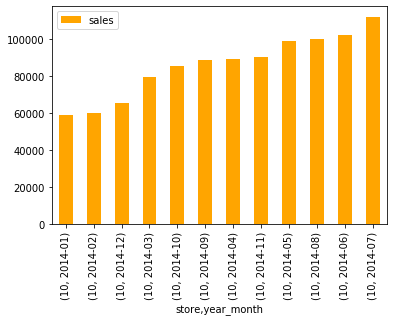

In [34]:
b.groupby('store').plot(kind = "bar",color = 'orange')

store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

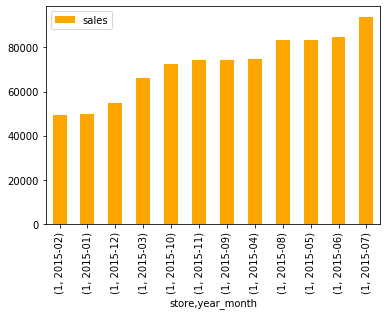

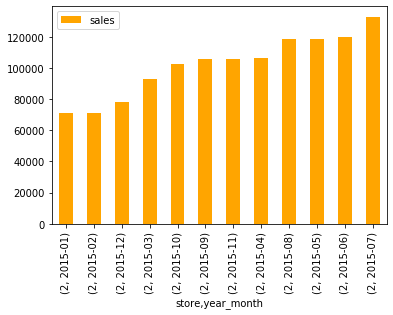

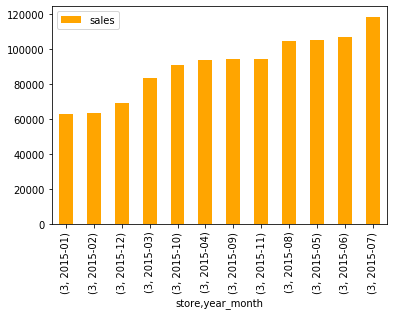

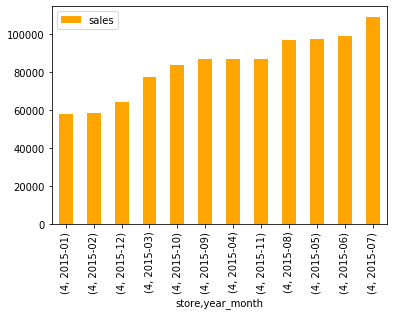

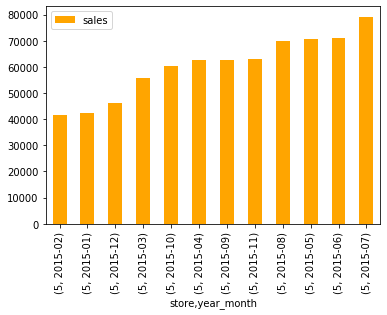

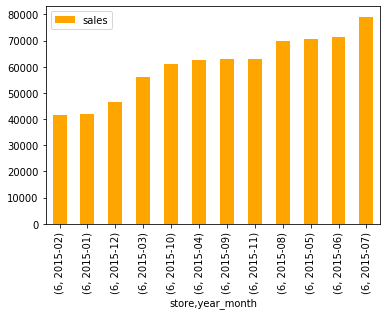

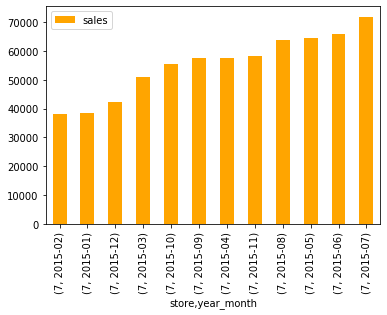

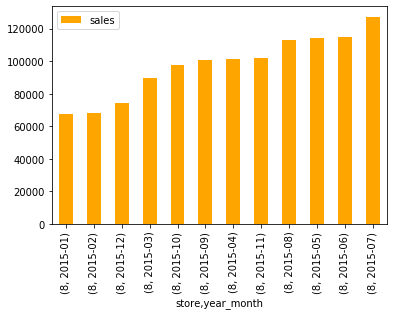

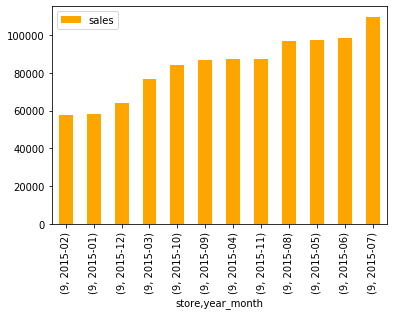

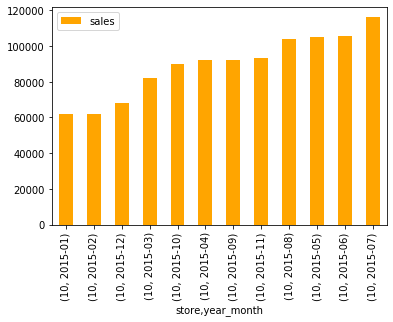

In [35]:
x = df_2015.groupby(['store','year_month']).agg({'sales':'sum'})
y = x.sort_values(by='sales', ascending=True)
y.groupby('store').plot(kind = "bar",color = 'orange')


store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

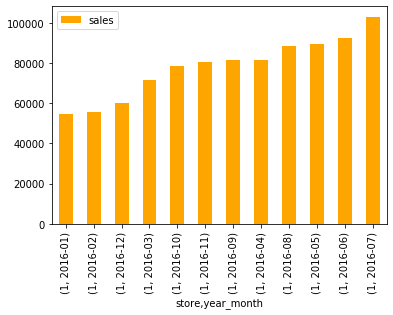

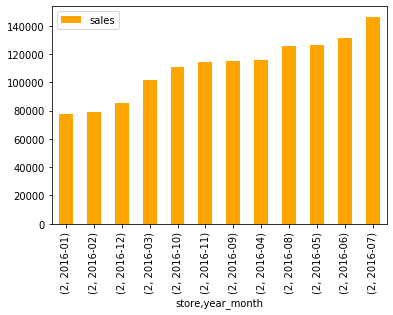

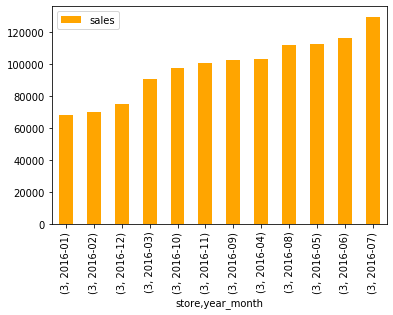

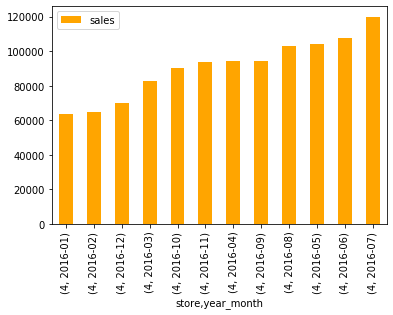

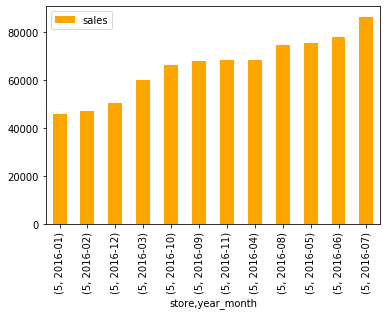

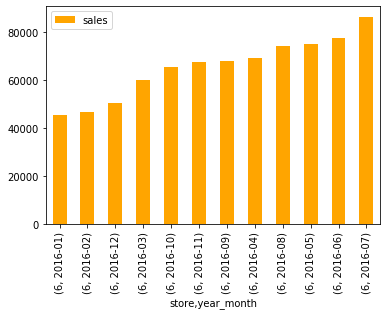

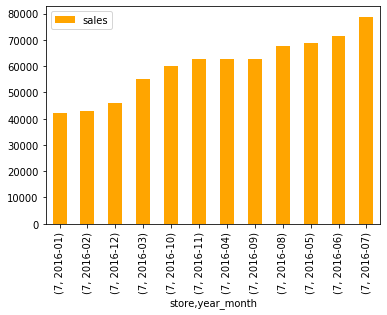

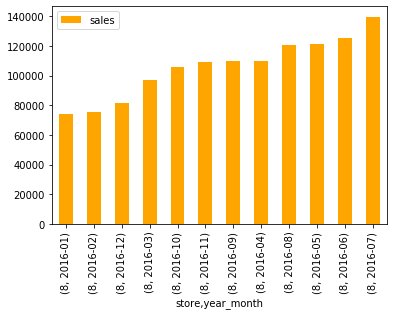

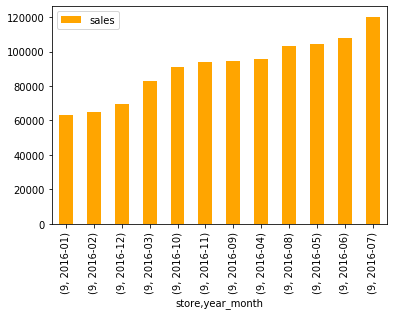

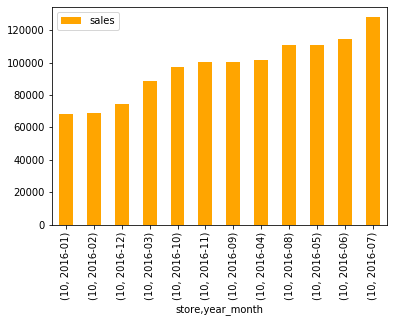

In [36]:
f = df_2016.groupby(['store','year_month']).agg({'sales':'sum'})
h = f.sort_values(by='sales', ascending=True)
h.groupby('store').plot(kind = "bar",color = 'orange')

store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

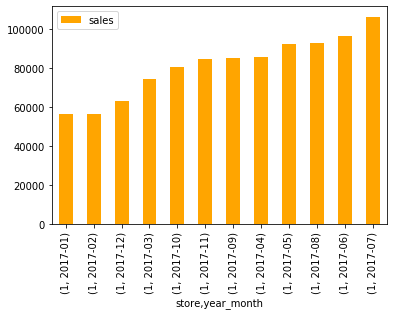

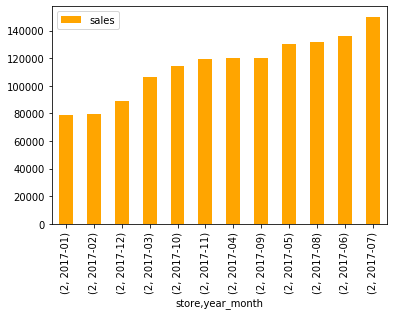

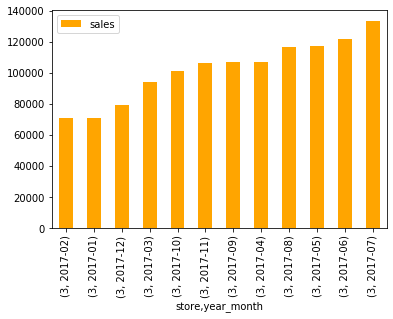

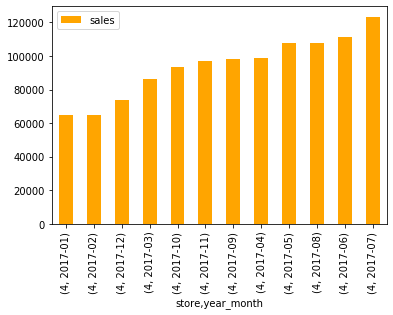

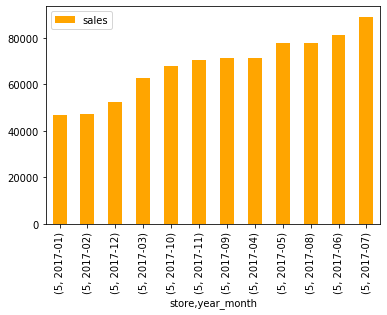

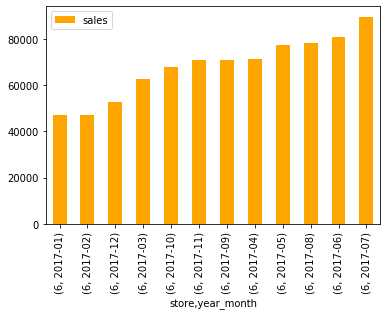

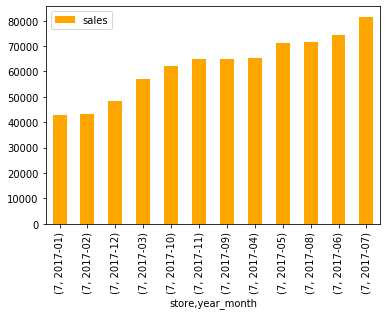

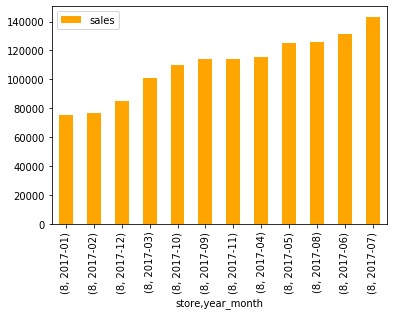

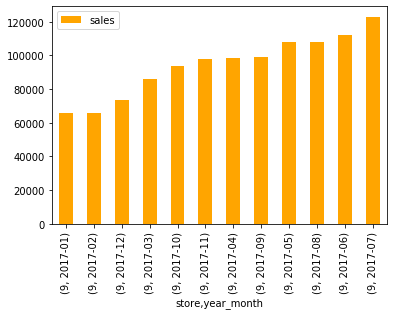

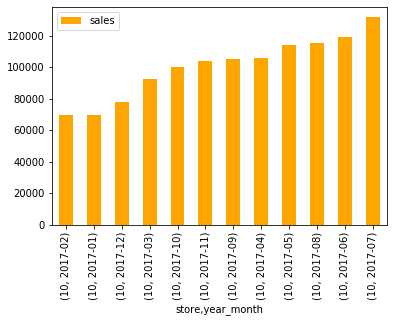

In [37]:
m = df_2017.groupby(['store','year_month']).agg({'sales':'sum'})
n = m.sort_values(by='sales', ascending=True)
n.groupby('store').plot(kind = "bar",color = 'orange')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
date          913000 non-null datetime64[ns]
store         913000 non-null int64
item          913000 non-null int64
sales         913000 non-null int64
year          913000 non-null int64
month         913000 non-null int64
year_month    913000 non-null period[M]
dtypes: datetime64[ns](1), int64(5), period[M](1)
memory usage: 48.8 MB


In [39]:
df['year_month'].dtype

period[M]

In [40]:
df[col].dtype

dtype('<M8[ns]')

In [41]:
grouped4 = df_2013.groupby(['store','year_month']).agg({'sales':'mean'})

In [42]:
grouped4

sales
store year_month           
1     2013-01     26.501290
      2013-02     29.504286
      2013-03     36.017419
      2013-04     41.015333
      2013-05     44.691613
      2013-06     47.687333
      2013-07     50.017419
      2013-08     44.996774
      2013-09     41.605333
      2013-10     38.148387
      2013-11     41.643333
      2013-12     29.696129
2     2013-01     37.754839
      2013-02     42.417143
      2013-03     51.360645
      2013-04     58.658000
      2013-05     63.458710
      2013-06     68.105333
      2013-07     70.738710
      2013-08     63.220645
      2013-09     59.115333
      2013-10     54.253548
      2013-11     59.249333
      2013-12     41.898065
3     2013-01     33.530323
      2013-02     37.200714
      2013-03     45.205806
      2013-04     51.844667
      2013-05     55.912258
      2013-06     60.439333
      2013-07     62.730968
      2013-08     56.489677
      2013-09     52.435333
      2013-10     48.124516
      2013-11     52.502667
      2013-12     37.375484
4     2013-01     30.787097
      2013-02     34.861429
      2013-03     41.627097
      2013-04     47.867333
      2013-05     51.927097
      2013-06     55.933333
      2013-07     58.114194
      2013-08     51.893548
      2013-09     48.162000
      2013-10     44.441290
      2013-11     48.764000
      2013-12     34.218065
5     2013-01     22.196774
      2013-02     24.941429
      2013-03     30.375484
      2013-04     34.629333
      2013-05     37.286452
      2013-06     40.536000
      2013-07     41.983871
      2013-08     37.656774
      2013-09     35.029333
      2013-10     32.178065
      2013-11     34.969333
      2013-12     24.850968
6     2013-01     22.544516
      2013-02     24.862857
      2013-03     30.460645
      2013-04     34.431333
      2013-05     37.246452
      2013-06     40.474667
      2013-07     41.918065
      2013-08     37.705161
      2013-09     34.984000
      2013-10     32.398065
      2013-11     35.306000
      2013-12     24.676129
7     2013-01     20.327742
      2013-02     22.872143
      2013-03     27.698065
      2013-04     31.642667
      2013-05     34.113548
      2013-06     36.884667
      2013-07     38.419355
      2013-08     34.487742
      2013-09     32.016000
      2013-10     29.627097
      2013-11     31.990667
      2013-12     22.681935
8     2013-01     36.156774
      2013-02     40.199286
      2013-03     48.960645
      2013-04     55.712000
      2013-05     60.485806
      2013-06     65.198000
      2013-07     67.767742
      2013-08     60.678710
      2013-09     56.481333
      2013-10     52.134839
      2013-11     56.552000
      2013-12     39.919355
9     2013-01     30.722581
      2013-02     34.421429
      2013-03     41.928387
      2013-04     47.854667
      2013-05     51.672903
      2013-06     55.613333
      2013-07     58.189677
      2013-08     52.032258
      2013-09     48.582000
      2013-10     44.640645
      2013-11     48.782000
      2013-12     34.587742
10    2013-01     32.964516
      2013-02     36.874286
      2013-03     44.676774
      2013-04     51.194000
      2013-05     55.619355
      2013-06     59.526000
      2013-07     62.327742
      2013-08     55.523226
      2013-09     51.527333
      2013-10     47.658065
      2013-11     52.002667
      2013-12     36.939355

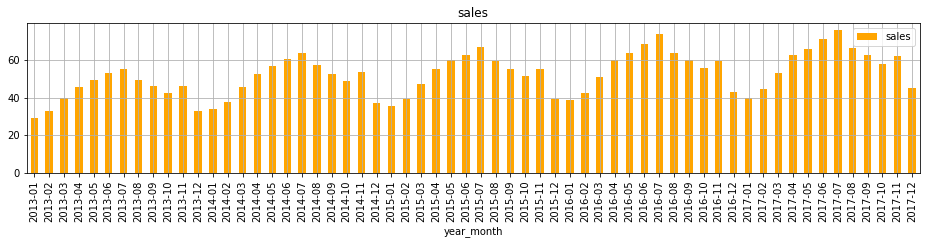

In [43]:
df.groupby('year_month')[['sales']].mean().plot(kind='bar', subplots=True, layout=(5,1), sharex=False, figsize=(16,16),grid = True,color = 'orange' )
plt.show()

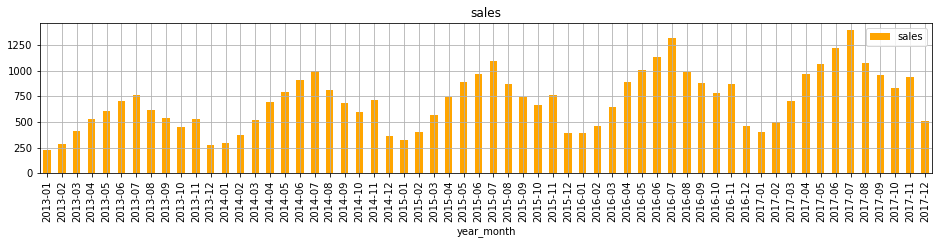

In [44]:
df.groupby('year_month')[['sales']].var().plot(kind='bar', subplots=True, layout=(5,1), sharex=False, figsize=(16,16),grid = True,color = 'orange' )
plt.show()

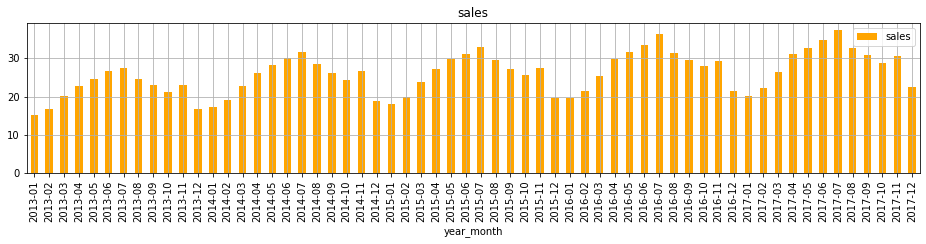

In [45]:
df.groupby('year_month')[['sales']].std().plot(kind='bar', subplots=True, layout=(5,1), sharex=False, figsize=(16,16),grid = True,color = 'orange' )
plt.show()

In [86]:
result_add = seasonal_decompose(df['sales'], model='additive', freq = 365)


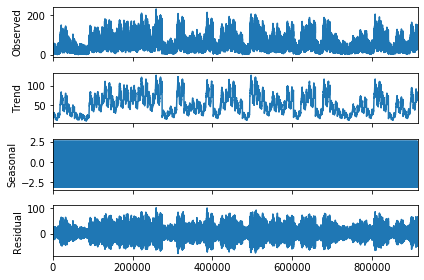

In [87]:
result_add.plot()
plt.show()

In [89]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
0,-0.272993,NaN,NaN,13
1,-0.000262,NaN,NaN,11
2,-0.151122,NaN,NaN,14
3,-0.079961,NaN,NaN,13
4,-0.494799,NaN,NaN,10


In [90]:
df.head()

,date,store,item,sales,year,month,year_month
0,2013-01-01,1,1,13,2013,1,2013-01
1,2013-01-02,1,1,11,2013,1,2013-01
2,2013-01-03,1,1,14,2013,1,2013-01
3,2013-01-04,1,1,13,2013,1,2013-01
4,2013-01-05,1,1,10,2013,1,2013-01


In [97]:
result = kpss(df.sales, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 15.285021
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Student\Miniconda3\envs\envone\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

C:\Users\Student\Miniconda3\envs\envone\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning:

p-value is smaller than the indicated p-value



#lag plots close scatter plots therefore great correlation with increased lag

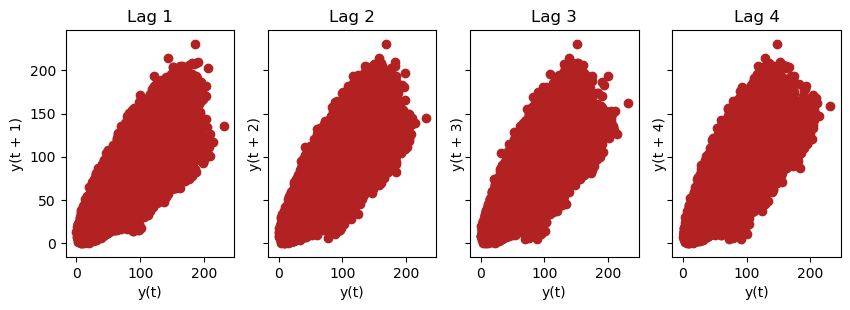

In [103]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.sales, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

    

   
plt.show()